In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from nsepy import get_history
from datetime import date



Using TensorFlow backend.


In [2]:
symbol = input("Enter symbol of stock\n")

df = get_history(symbol=symbol, start=date(2010,1,1), end=date.today())
df['Date'] = df.index


Enter symbol of stock
reliance


In [3]:
df.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Date
Date,,,,,,,,,,,,,,,
2020-05-11,RELIANCE,EQ,1561.80,1580.0,1615.00,1572.30,1575.00,1576.80,1592.89,30670404,4.885457e+15,576001.0,11723342,0.3822,2020-05-11
2020-05-12,RELIANCE,EQ,1576.80,1564.8,1568.35,1465.00,1486.45,1479.25,1511.39,46029119,6.956801e+15,807575.0,18435434,0.4005,2020-05-12
2020-05-13,RELIANCE,EQ,1479.25,1527.0,1527.00,1454.00,1492.50,1496.45,1481.10,30658051,4.540763e+15,615366.0,6403617,0.2089,2020-05-13
2020-05-14,RELIANCE,EQ,1496.45,1469.0,1496.70,1430.05,1437.00,1435.95,1457.61,22736714,3.314119e+15,494402.0,7400518,0.3255,2020-05-14
2020-05-15,RELIANCE,EQ,1435.95,1444.0,1466.70,1415.10,1453.20,1459.40,1439.85,28683432,4.129983e+15,592403.0,7448167,0.2597,2020-05-15


In [4]:
df.shape

(2573, 15)

In [5]:
# import plotly.offline as pyo
# import plotly.graph_objs as go
# from plotly.offline import iplot

# import cufflinks as cf
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 


# cf.go_offline()

# def configure_plotly_browser_state():
#   import IPython
#   display(IPython.core.display.HTML('''
#         <script src="/static/components/requirejs/require.js"></script>
#         <script>
#           requirejs.config({
#             paths: {
#               base: '/static/base',
#               plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
#             },
#           });
#         </script>
#         '''))
    
# configure_plotly_browser_state()
# init_notebook_mode(connected=False)

# df.iplot(kind='scatter', x='Date', y='Close',color=['gold'], 
# theme='solar', mode='lines', xTitle='Date', yTitle='Close Price')

# plt.show()

/home/abhiwalia/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


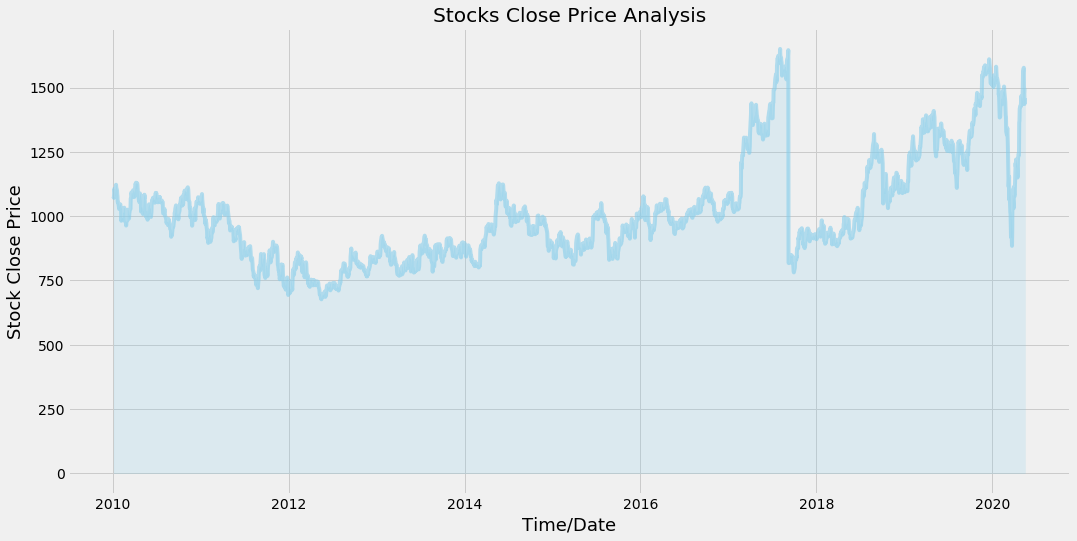

In [6]:
plt.figure(figsize=(16,8))
plt.title('Stocks Close Price Analysis')

plt.fill_between( df['Date'], df['Close'], color="skyblue", alpha=0.2)
plt.plot(df['Date'], df['Close'], color="skyblue", alpha=0.6)

plt.xlabel('Time/Date',fontsize=18)
plt.ylabel('Stock Close Price',fontsize=18)
plt.show()

In [7]:
close_col = df.filter(['Close'])
close_col_val = close_col.values
#divide the dataset into training data(75%) and testing data(25%)
train_len = math.ceil(len(close_col_val) *.75)

mm_scale = MinMaxScaler(feature_range=(0, 1)) 
mm_scale_data = mm_scale.fit_transform(close_col_val)

In [8]:
train_data_val = mm_scale_data[0:train_len  , : ]

#Split the data
x_train=[]
y_train = []

for i in range(30, len(train_data_val)):
    x_train.append(train_data_val[i-30:i,0])
    y_train.append(train_data_val[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [10]:
# #Build the model

# regressor = Sequential()
# model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(LSTM(units=50, return_sequences=False))
# model.add(Dense(units=25))
# model.add(Dense(units=1))

# #Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# #Train the model
# model.fit(x_train, y_train, batch_size=50, epochs=100)

# model.save(symbol+'.model')

In [11]:
from keras.layers import Dropout

# Initialising the RNN
network = Sequential()
network.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
network.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
network.add(LSTM(units = 50, return_sequences = True))
network.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
network.add(LSTM(units = 50, return_sequences = True))
network.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
network.add(LSTM(units = 50))
network.add(Dropout(0.2))
# Adding the output layer
# For Full connection layer we use dense
# As the output is 1D so we use unit=1
network.add(Dense(units = 1))
# Compiling the RNN
# For optimizer we can go through keras optimizers Docomentation
# As it is regression problem so we use mean squared error
network.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
# For best fit accourding to data we can increase the epochs
# For forward & back propageted and update weights we use 5  inputs to train 
network.fit(x_train, y_train, epochs = 100, batch_size = 50)








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1900/1900 [==============================] - 17s 9ms/step - loss: 0.0210
Epoch 2/100
1900/1900 [==============================] - 9s 5ms/step - loss: 0.0068
Epoch 3/100
1900/1900 [==============================] - 9s 5ms/step - loss: 0.0060
Epoch 4/100
1900/1900 [==============================] - 9s 5ms/step - loss: 0.0054
Epoch 5/100
1900/1900 [==============================] - 9s 5ms/step - loss: 0.0051
Epoch 6/100
1900/1900 [==============================] - 9s 5ms/step - loss: 0.0048
Epoch 7/100
1900/1900 [==============================] - 9s 5ms/step - loss: 0.0045
Epoch 8/100
1900/1900 [==============================] - 9s 4ms/step - loss: 0.0043
Epoch 9/100
1900/1900 [==============================] - 9s 5ms/step - loss: 0.0043
Epoch 10/100
1900/190

In [38]:
network.save(symbol+'.model')

In [14]:
test_data_val = mm_scale_data[train_len - 30: , : ]

#Create the x_test and y_test data sets
x_test = []
y_test =  close_col_val[train_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(30,len(test_data_val)):
    x_test.append(test_data_val[i-30:i,0])
    
#Convert x_test to a numpy array 
x_test = np.array(x_test)

#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [16]:
#Getting the models predicted price values
preds = network.predict(x_test) 
preds = mm_scale.inverse_transform(preds)#Undo scaling

#Calculate/Get the value of RMSE
error_score=np.sqrt(np.mean(((preds- y_test)**2)))
error_score

28.372691872163063

/home/abhiwalia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


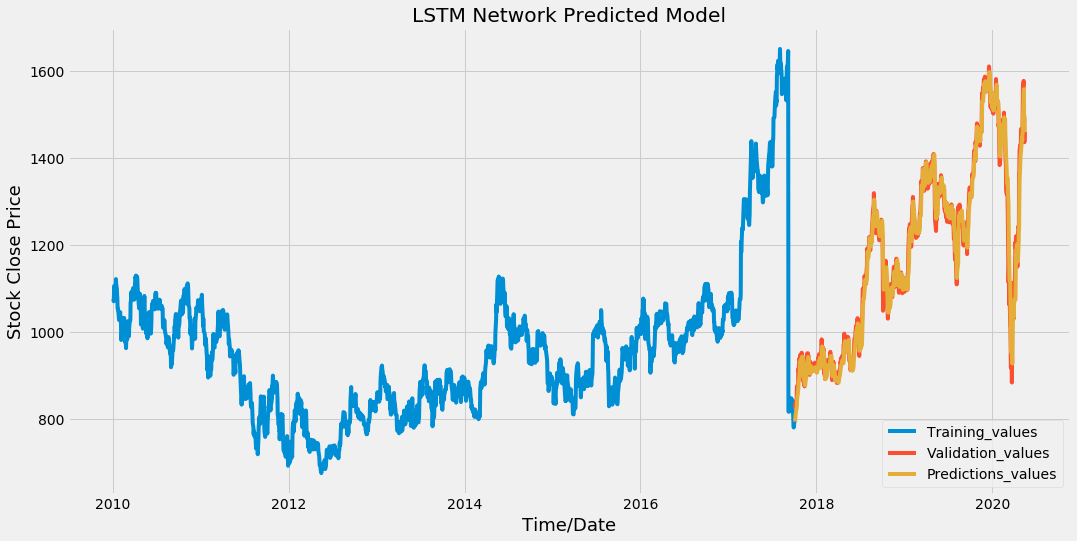

In [21]:
#Plot/Create the data for the graph
training_data = close_col[:train_len]
validation_data = close_col[train_len:]
validation_data['Preds'] = preds

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('LSTM Network Predicted Model')
plt.xlabel('Time/Date', fontsize=18)
plt.ylabel('Stock Close Price', fontsize=18)
plt.plot(training_data['Close'])
plt.plot(validation_data[['Close', 'Preds']])
plt.legend(['Training_values', 'Validation_values', 'Predictions_values'], loc='lower right')
plt.show()

In [23]:
#Show the valid and predicted prices
validation_data[-5:]

,Close,Preds
Date,,
2020-05-11,1576.80,1539.432617
2020-05-12,1479.25,1557.750244
2020-05-13,1496.45,1482.462158
2020-05-14,1435.95,1489.229614
2020-05-15,1459.40,1458.834839


In [35]:
#Create a new dataframe
new_close_col = df.filter(['Close'])

#Get teh last 30 day closing price 
new_close_col_val = new_close_col[-30:].values
#Scale the data to be values between 0 and 1
new_close_col_val_scale = mm_scale.transform(new_close_col_val)
#Create an empty list
X_test = []
#Append teh past 1 days
X_test.append(new_close_col_val_scale)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
new_preds = network.predict(X_test)
#undo the scaling 
new_preds = mm_scale.inverse_transform(new_preds)
print(new_preds[0])

[1469.6179]
